In [55]:
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [42]:
# Load the data
data = pd.read_csv('/Users/ZYZhao/projects/AL/onek/hg/3k.hg.csv')
data

,query,p_genome,avg_abund,p_metag,metagenome name
0,bosTau9.fa.gz,0.00%,1.0,0.00%,ERR9456920
1,bosTau9.fa.gz,0.00%,1.2,0.00%,ERR3610816
2,bosTau9.fa.gz,0.00%,1.0,0.00%,SRR7664969
3,bosTau9.fa.gz,0.00%,20.2,0.10%,SRR12180980
4,bosTau9.fa.gz,0.00%,3.2,0.00%,SRR6713626
...,...,...,...,...,...
19440,susScr11.fa.gz,0.00%,7.9,0.10%,SRR5808817
19441,susScr11.fa.gz,0.00%,1.5,0.00%,SRR10810041
19442,susScr11.fa.gz,0.00%,2.6,0.00%,ERR2607371
19443,susScr11.fa.gz,0.00%,12.6,0.10%,SRR12180994


In [43]:
data['p_genome'] = data['p_genome'].str.rstrip('%').astype(float)

# Group by 'query' and calculate statistics
result = data.groupby('query')['p_genome'].agg(['mean', 'min', 'max', 'sum'])

print(result)

                    mean  min   max     sum
query                                      
bosTau9.fa.gz   0.080938  0.0  23.6   184.7
canFam6.fa.gz   0.018541  0.0   1.6    46.5
felCat9.fa.gz   0.011960  0.0   0.5    29.6
galGal6.fa.gz   0.312086  0.0  67.8   754.0
hg38.all        0.418309  0.0  63.4  1044.1
mm39.fa.gz      1.431974  0.0  89.8  3547.0
oviAri4.fa.gz   0.023404  0.0   4.9    56.1
susScr11.fa.gz  0.176650  0.0  49.2   422.9


In [61]:
# Calculate the number of metagenomes with p_genome > 10% for each query
count_p_genome_gt_10 = data[data['p_genome'] > 10].groupby('query').size()

# Add this information to the result table
result['count_p_genome_gt_10'] = result.index.map(count_p_genome_gt_10).fillna(0).astype(int)

# Display the updated result
print(result)


                    mean  min   max     sum  count_p_genome_gt_10
query                                                            
bosTau9.fa.gz   0.080938  0.0  23.6   184.7                     5
canFam6.fa.gz   0.018541  0.0   1.6    46.5                     0
felCat9.fa.gz   0.011960  0.0   0.5    29.6                     0
galGal6.fa.gz   0.312086  0.0  67.8   754.0                    18
hg38.all        0.418309  0.0  63.4  1044.1                    30
mm39.fa.gz      1.431974  0.0  89.8  3547.0                    70
oviAri4.fa.gz   0.023404  0.0   4.9    56.1                     0
susScr11.fa.gz  0.176650  0.0  49.2   422.9                     7


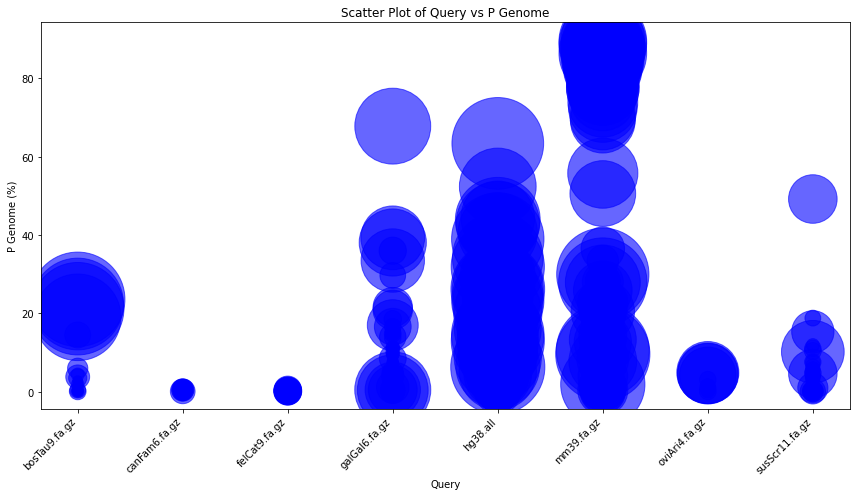

In [46]:
data = pd.read_csv('/Users/ZYZhao/projects/AL/onek/hg/3k.hg.csv')

# Convert p_genome and p_metag columns to numeric after stripping the '%' sign
data["p_genome"] = data["p_genome"].str.rstrip('%').astype(float)
data["p_metag"] = data["p_metag"].str.rstrip('%').astype(float)

# Filter data to include only rows where p_genome > 0
filtered_data = data[data["p_genome"] > 0]

# Plot scatter plot
plt.figure(figsize=(12, 7))
plt.scatter(
    filtered_data["query"], 
    filtered_data["p_genome"], 
    s=filtered_data["p_metag"] * 100,  # Scale dot size based on p_metag
    alpha=0.6, 
    c="blue"
)
plt.xlabel("Query")
plt.ylabel("P Genome (%)")
plt.title("Scatter Plot of Query vs P Genome")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [58]:
mm39_data = data[data["query"] == "mm39.fa.gz"].sort_values(by="p_genome", ascending=False)

# Select relevant columns for display
mm39_data_sorted = mm39_data[["query", "p_genome", "avg_abund", "p_metag", "metagenome name"]]

# Filter rows where p_genome is greater than 10%
filtered_mm39_data = mm39_data_sorted[mm39_data_sorted["p_genome"] > 10]

# Display the filtered data
print(filtered_mm39_data)

            query  p_genome  avg_abund  p_metag metagenome name
12825  mm39.fa.gz      89.8        4.7     70.0     SRR18439526
14143  mm39.fa.gz      89.4        4.3     76.9     SRR18439531
12426  mm39.fa.gz      88.6        4.4     76.6     SRR18439537
13038  mm39.fa.gz      88.5        4.4     68.7     SRR18439549
14050  mm39.fa.gz      87.6        4.2     71.2     SRR18439548
...           ...       ...        ...      ...             ...
12722  mm39.fa.gz      11.2        1.5      3.6     SRR15604628
13007  mm39.fa.gz      11.1        1.6      4.0     SRR15604630
12991  mm39.fa.gz      10.5        1.7     21.7     SRR16350210
14133  mm39.fa.gz      10.5        1.5     86.4      ERR3357553
13103  mm39.fa.gz      10.2        1.8      9.5     SRR12270116

[70 rows x 5 columns]


In [ ]:
The scatter plot has been updated, including:

1. **Color coding** based on the `metagenome name`.
2. A **legend for dot size**, representing `p_metag`.
3. A **legend for metagenome names**, indicating the color associated with each metagenome.

/var/folders/s9/2gscp4217xx30p4htg050dx40000gp/T/ipykernel_39064/1599578775.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



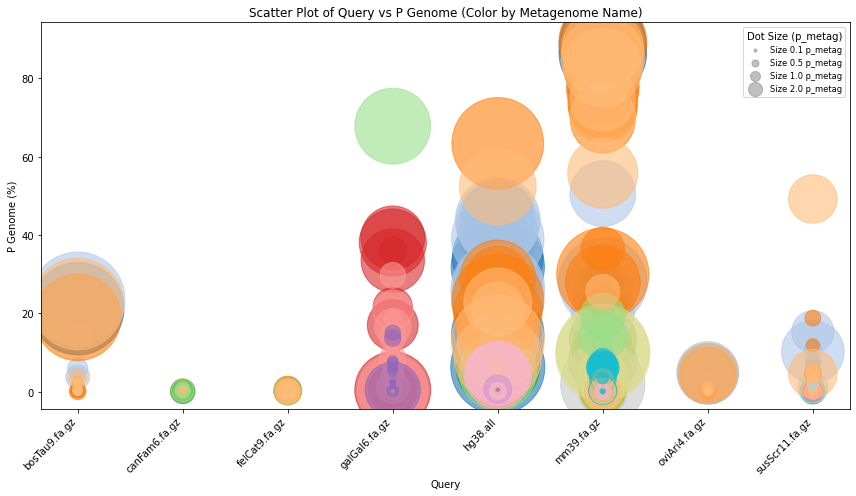

In [60]:
# Load the uploaded CSV file
file_path = '/Users/ZYZhao/projects/AL/onek/hg/3k.hg.csv'

# Load the data from the uploaded CSV
data = pd.read_csv(file_path)

# Convert p_genome and p_metag columns to numeric after stripping the '%' sign
data["p_genome"] = data["p_genome"].str.rstrip('%').astype(float)
data["p_metag"] = data["p_metag"].str.rstrip('%').astype(float)

# Filter data to include only rows where p_genome > 0
filtered_data = data[data["p_genome"] > 0]

# Assign unique colors for metagenome names
unique_metagenomes = filtered_data["metagenome name"].unique()
colors = cm.tab20(np.linspace(0, 1, len(unique_metagenomes)))  # Diverse colors
color_map = dict(zip(unique_metagenomes, colors))
filtered_data["color"] = filtered_data["metagenome name"].map(color_map)

# Plot scatter plot with legend for metagenome names and dot size
plt.figure(figsize=(12, 7))

# Scatter plot
plt.scatter(
    filtered_data["query"],
    filtered_data["p_genome"],
    s=filtered_data["p_metag"] * 100,  # Scale dot size based on p_metag
    c=filtered_data["color"],  # Color based on metagenome name
    alpha=0.6,
    marker='o'
)

# Add size legend for dots
for size in [10, 50, 100, 200]:
    plt.scatter([], [], s=size, c='gray', alpha=0.5, label=f'Size {size/100} p_metag')

# Add legend for metagenome names
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, alpha=0.6)
           for color in color_map.values()]
labels = color_map.keys()
#legend_metagenome = plt.legend(handles, labels, title="Metagenome Name", loc="upper left", fontsize='small')
#plt.gca().add_artist(legend_metagenome)  # Add the metagenome legend first

# Add size legend to the plot
plt.legend(title="Dot Size (p_metag)", loc="upper right", fontsize='small')

# Add axis labels and title
plt.xlabel("Query")
plt.ylabel("P Genome (%)")
plt.title("Scatter Plot of Query vs P Genome (Color by Metagenome Name)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [63]:
import pandas as pd
import numpy as np
import plotly.express as px

# Filter the data (assuming `data` is already loaded and processed)
filtered_high_p_genome = data[data["p_genome"] > 10]

# Create an interactive scatter plot
fig = px.scatter(
    filtered_high_p_genome,
    x="query",
    y="p_genome",
    size="p_metag",  # Dot size based on p_metag
    color="metagenome name",  # Dot color based on metagenome name
    title="Interactive Scatter Plot of Query vs P Genome (p_genome > 10%)",
    labels={"query": "Query", "p_genome": "P Genome (%)"},
    hover_data=["metagenome name", "avg_abund", "p_metag"]
)

# Show the interactive chart
fig.show()